# 폭탄 구현하기 (2) (구름톤 9일차)
- 난이도: ★★
- https://level.goorm.io/exam/195691/%ED%8F%AD%ED%83%84-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-2/quiz/1

## [문제]

$N \times N$ 크기의 정사각형 모양의 땅이 있다. 땅을 $1 \times 1$ 크기의 작은 땅으로 나누었을 때, 위에서 $y$번째, 왼쪽에서 $x$번째에 위치한 땅의 좌표를 $(y, x)$로 나타낸다. 추가로 모든 땅에는 **폭탄 값**이라고 하는 값이 있다. 모든 폭탄 값의 초기 값은 $0$이다.

$K$개의 폭탄을 이 땅 위에 떨어트리려고 한다. 어떤 $1 \times 1$ 크기의 땅 위에 폭탄을 떨어트리게 되면 폭탄이 떨어진 땅과, 그 땅에 상하좌우로 인접한 칸의 폭탄 값에 영향을 끼친다. 폭탄 값이 변하는 정도는 **땅의 상태**에 따라 다르다.

- $N \times N$ 크기의 영역 밖이거나, 땅의 상태가 ```#```이라면 폭탄 값은 변하지 않는다.
- 땅의 상태가 ```0```이라면 폭탄 값은 $1$ 증가한다.
- 땅의 상태가 ```@```이라면 폭탄 값은 $2$ 증가한다.

모든 폭탄을 떨어트린 뒤에, 모든 땅의 폭탄 값 중에서 가장 높은 값을 출력해보자.

## 예제 설명

첫 번째 예제를 그림으로 표현하면 다음과 같다.

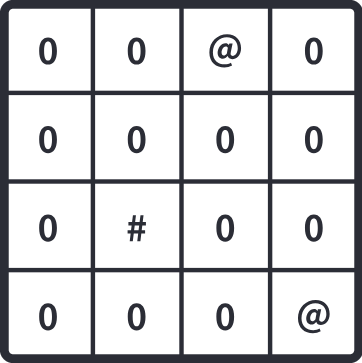

$(2, 2)$에 폭탄이 떨어지면 폭탄 값은 다음과 같이 변한다. 상태가 ```#```인 $(3, 2)는 폭탄의 영향을 받지 않는다.

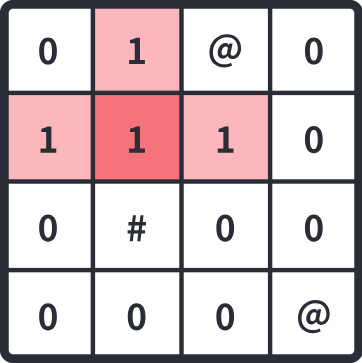

$(2, 3)$에 폭탄이 떨어지면 폭탄 값은 다음과 같이 변한다. 상태가 ```@```인 $(1, 3)은 폭탄 값이 **2** 증가한다.

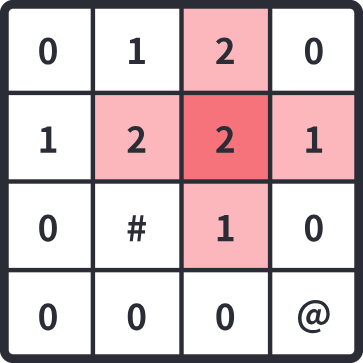

마지막으로 $(1, 4)$에 폭탄이 두 개 떨어진 뒤의 폭탄 값은 다음과 같다.

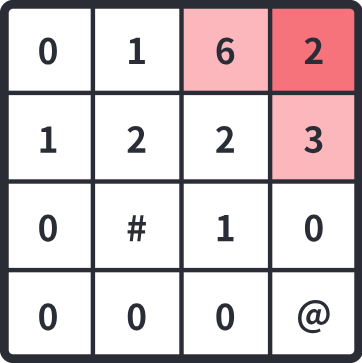

모든 땅 중 가장 큰 폭탄 값은 **6**이므로, 답으로 **6**을 출력해야 한다.

## [입력]

첫째 줄에 땅의 한 변의 길이 $N$과 폭탄을 떨어트릴 횟수 $K$가 공백을 두고 주어진다.

다음 $N$개의 줄에는 땅의 상태를 나타내는 $N$개의 문자가 공백을 두고 주어진다. $r$번째 줄에서 $c$번쨰로 주어지는 문자는 $(r, c)$ 좌표에 해당하는 땅의 상태이다.

다음 $K$개의 줄에는 폭탄을 떨어트릴 땅의 좌표를 나타내는 $y, x$가 공백을 두고 주어진다. 이는 $(y, x)$ 좌표에 폭탄을 떨어트린다는 의미이다.

- $1 \le N \le 200$
- $1 \le K \le 500,000$
- 땅의 상태는 ```0```, ```@```, ```#``` 중 하나이다.
- $1 \le y, x \le N$
- 입력에서 주어지는 모든 수는 정수이다.

## [출력]

모든 폭탄을 떨어트린 뒤에, 모든 땅의 폭탄 값 중에서 가장 높은 값을 출력한다.

## [예시]

**예시 1**

입력
```
4 4
0 0 @ 0
0 0 0 0
0 # 0 0
0 0 0 @
2 2
2 3
1 4
1 4
```

출력
```
6
```

**예시 2**

입력
```
4 4
0 @ 0 0
@ 0 @ 0
0 @ 0 0
0 0 0 0
2 2
2 2
2 2
2 2
```

출력
```
8
```

In [1]:
# My Solution (1)

n, k = map(int, input().split())
maps = [input().split() for _ in range(n)]
bombs = [list(map(int, input().split())) for _ in range(k)]
bomb_scores = {}

for bomb in bombs:
    y, x = bomb[0] - 1, bomb[1] - 1
    positions = [[y, x], [y + 1, x], [y - 1, x], [y, x + 1], [y, x - 1]]
    for position in positions:
        if 0 <= position[0] < n and 0 <= position[1] < n:
            try:
                bomb_scores[(position[0], position[1])] += 1
            except:
                bomb_scores[(position[0], position[1])] = 1

max_score = max(bomb_scores.values())
answer = 0
scores_by_status = {"#": 0, "0": 1, "@": 2}
for key, value in bomb_scores.items():
    score = value * scores_by_status[maps[key[0]][key[1]]]
    if score > answer:
        answer = score
    if answer >= 2 * max_score:
        break
    
print(answer)

100
9


## [후기]

각 폭탄에 의해 계산되는 **폭탄 값을 저장하기 위한 딕셔너리**를 하나 만들었다. 최초의 생각은 $N \times N$ 크기의 배열을 또 하나 만드는 것이었으나, 그것보다는 딕셔너리를 활용하는 게 시간적, 공간적으로 더 효과적이리라고 생각했다.

거기까진 다 좋았는데 자꾸 몇 개의 케이스에서 오답이 나왔다. 이유를 몰라서 찾다 찾다 도저히 답이 안 나와서 챗지피티한테 물어보기까지 했는데도 오류의 근원지를 알아내지 못했다. 그러다가 내가 결국 찾아냈다. 원인은 ```answer = max_score```에 있었다. 초기 값을 ```max_score```로 지정해버렸더니, 추후 ```#```으로 인해 무시되어야 하는 점수가 이미 최고점으로 책정되어 출력되는 문제가 있었다. 그래서 ```answer = 0```으로 초기값을 바꿔줬더니 해결됐다.

난이도 자체가 크게 어려웠다기보단 오류를 발견해 내는 데에 시간을 많이 썼던 문제였다.